In [15]:
import os
import torch
import cv2
from dct import LinearDCT, dct_2d, idct_2d, apply_linear_2d
from main import DCTCompressor, WHTCompressor
from matplotlib import pyplot as plt
compressors = {'DCT': DCTCompressor(), 'WHT': WHTCompressor()}

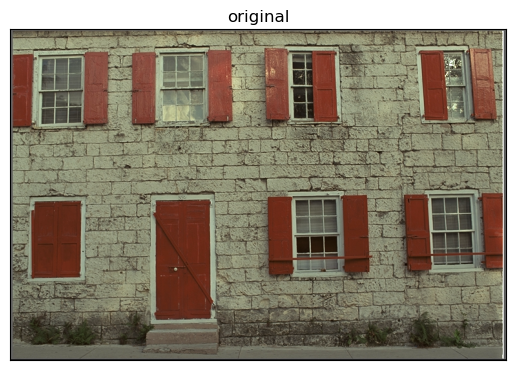

In [16]:
img = cv2.imread('data/kodak/kodim01.png')
plt.xticks([]), plt.yticks([])
plt.title('original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

DCT_kodim01.png approx. size: 595864Bytes, bitrate: 12.122884114583334


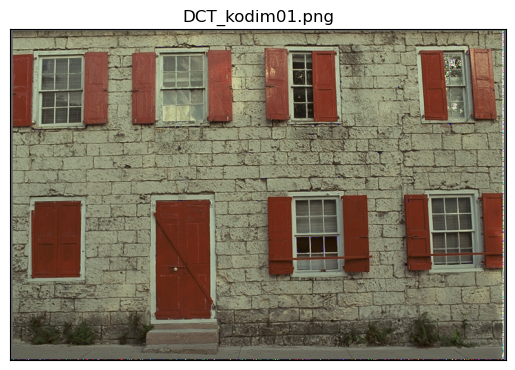

WHT_kodim01.png approx. size: 251919Bytes, bitrate: 5.12530517578125


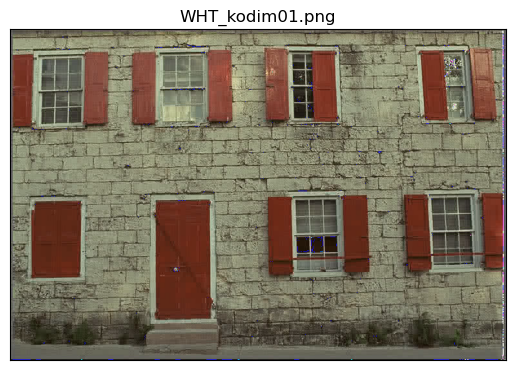

In [17]:
for compressor_name, compressor in compressors.items():
    result, org_size = compressor.compress(img)
    approx_size = compressor.approximate_size(result)
    print(f'{compressor_name}_kodim01.png approx. size: {approx_size}Bytes, bitrate: {approx_size * 8 / img.shape[0] / img.shape[1]}')
    final = compressor.decompress(result, org_size)
    # cv2.imshow(f'{compressor_name}_kodim01.png', final)
    plt.xticks([]), plt.yticks([])
    plt.title(f'{compressor_name}_kodim01.png')
    plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
    plt.show()